In [1]:
require(ggplot2)
require(dplyr)
require(tidyverse)
require(RColorBrewer)
require(cowplot)

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: RColorBrewer

Loading required package: cowplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cow

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#install.packages("gridExtra")
#install.packages("cowplot")
#install.packages("psych")
#install.packages("googledrive")

In [5]:
# getwd()
setwd("/content/drive/MyDrive/AAFT_Draft/Data")
profiles <- read.csv("survey/xhl_profiles.csv")
posts <- read.csv("survey/xhl_posts.csv")

In [52]:
head(posts)

,X,gender,date,age,height,loc,edu,description
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,1,male,2024-06-03,31,177,辽宁 抚顺市,college associate,主要是是像给父母家人一个结果！
2,2,male,2024-06-02,42,174,辽宁 铁岭市,college associate,国企在职员工，父母均已退休，本人82年的，身高176，体重160，0，寻真诚的les *
3,3,male,2024-06-02,38,186,云南 昆明市,college associate,如果你也是只为了给家里人一个交*。只为了一个*式而已。合适就可以走个*式。给对方家长一个交*可以相处试试。目前有个男性伴侣。以后是否要孩子可
4,4,male,2024-06-02,35,181,吉林 长春市,college,同城，父母电力系统均已退休，家庭事很少，没有彩礼，不办婚礼，简单答谢宴收回礼，头像和资料都是真实填写，详细私聊沟通。企鹅66723094逢年
5,5,male,2024-06-01,31,170,福建 厦门市,college associate,找一个合作对象，办婚礼，可以不领证，也可以不要小孩，逢年过节配合对方应付家人
6,6,male,2024-06-01,34,170,江苏 徐州市,high school associate,徐州男找女自己有房有车，开了个小店，本人真诚善良！找形婚，可商量要小孩。加v信15262106112，条件都可商量！可以当作朋友相处不干扰你


In [58]:
#################################### profiles ####################################

# needed variables:

age_summary <- profiles %>%
  group_by(gender) %>%
  summarise(
    mean_age = mean(age, na.rm = T),
    sd_age = sd(age, na.rm = T)
  )

income_summary <- profiles %>%
  filter(!is.na(income)) %>%
  group_by(gender, income) %>%
  summarise(count = n()) %>%
  mutate(p = count / sum(count) * 100)

# edu data missing

marr_summary <- profiles %>%
  filter(!is.na(marr)) %>%
  group_by(gender, marr) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

gender_summary <- profiles %>%
  filter(!is.na(gender)) %>%
  group_by(gender) %>%
  summarise(count = n()) %>%
  mutate(p = count / sum(count) * 100)

#################################### posts ####################################

summary <- posts %>%
  group_by(gender) %>%
  summarise(
    mean_age = mean(age, na.rm = T),
    sd_age = sd(age, na.rm = T),
    mean_h = mean(height, na.rm = T),
    sd_h = sd(height, na.rm = T)
  )

edu_summary_posts <- posts %>%
  filter(!is.na(edu)) %>%
  group_by(gender, edu) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

gender_summary_posts <- posts %>%
  filter(!is.na(gender)) %>%
  group_by(gender) %>%
  summarise(count = n()) %>%
  mutate(p = count / sum(count) * 100)

summary$p <- gender_summary_posts$p

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


In [59]:
summary

gender,mean_age,sd_age,mean_h,sd_h,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
female,30.44563,4.545201,163.2214,6.400344,27.8732
male,31.49459,4.521610,175.0130,5.035443,72.1268


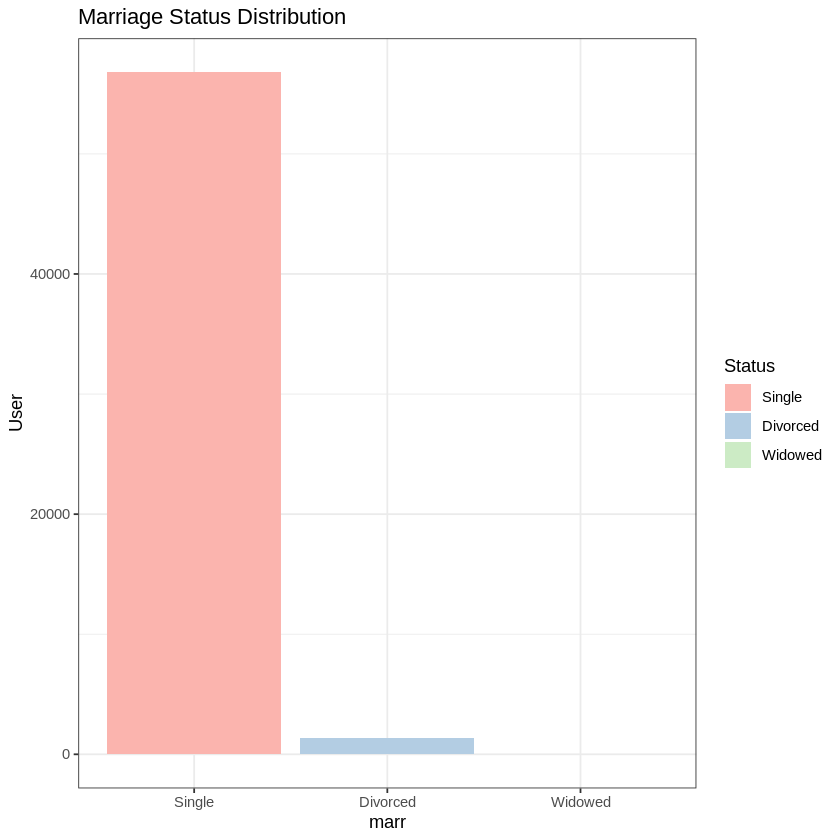

In [ ]:
# unique(profiles$marr)
profiles$marr <- factor(profiles$marr, levels = c("Single", "Divorced", "Widowed"))

ggplot(profiles %>% filter(!is.na(marr)), aes(x = marr, fill = marr)) +
  geom_bar() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(y = "User", title = "Marriage Status Distribution", fill = "Status") +
  theme_bw()

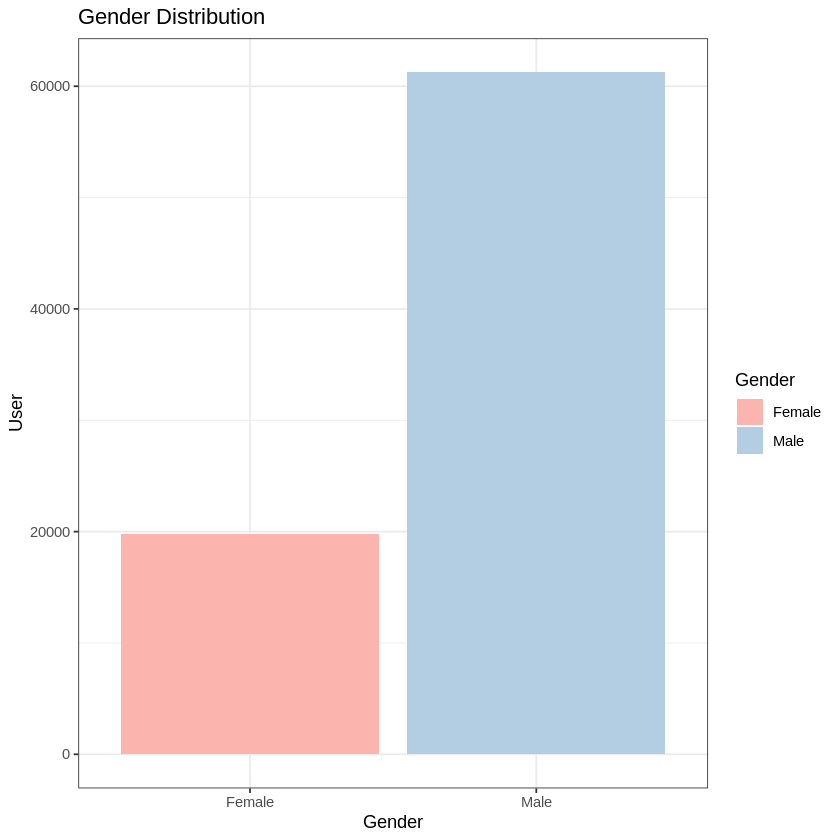

In [ ]:
ggplot(profiles %>% filter(!is.na(gender)), aes(x = gender, fill = gender)) +
  geom_bar() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(x = "Gender", y = "User", title = "Gender Distribution", fill = "Gender") +
  theme_bw()

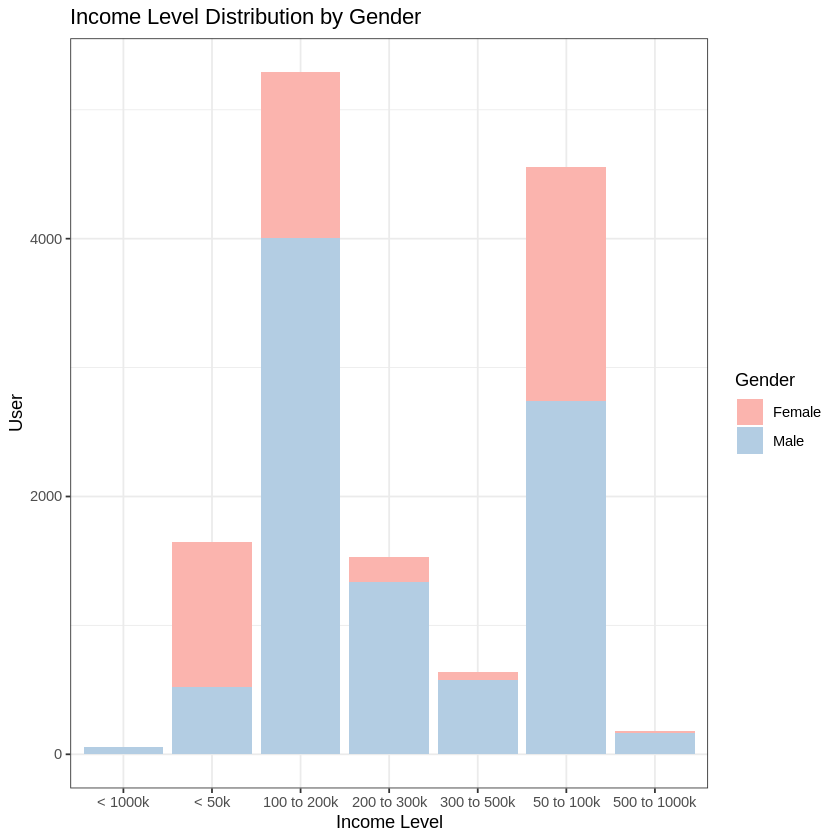

In [ ]:
ggplot(profiles %>% filter(!is.na(income)), aes(x = income, fill = gender)) +
  geom_bar() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(x = "Income Level", y = "User", title = "Income Level Distribution by Gender", fill = "Gender") +
  theme_bw()

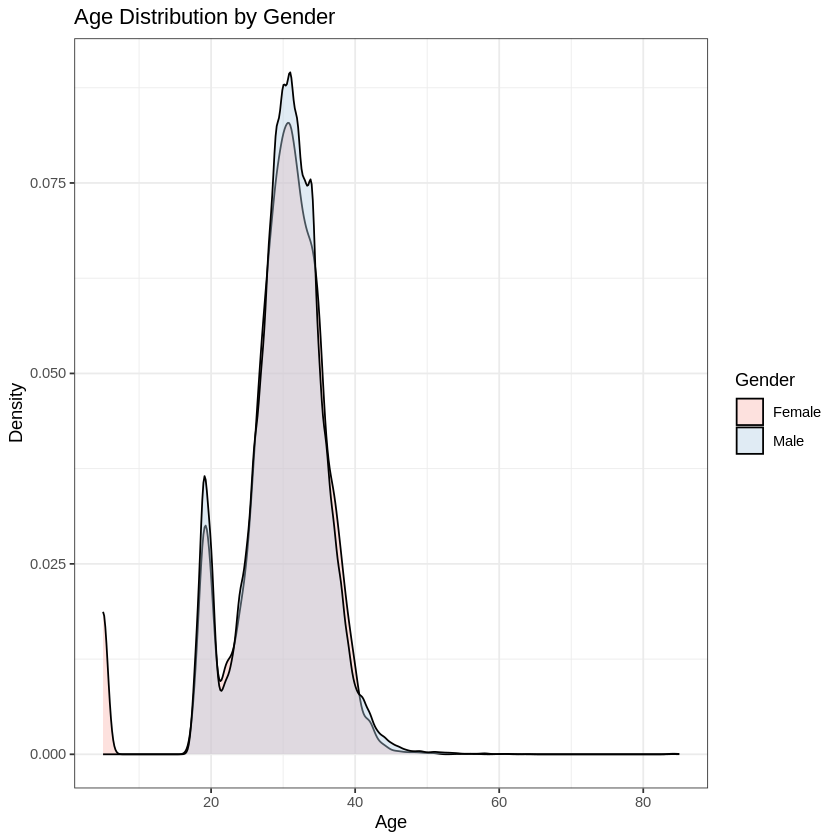

In [ ]:
ggplot(profiles %>% filter(!is.na(age)), aes(x = age, fill = gender)) +
  geom_density(alpha = 0.4) +
  scale_fill_brewer(palette = "Pastel1") +
  labs(title = "Age Distribution by Gender", x = "Age", y = "Density", fill = "Gender") +
  theme_bw()

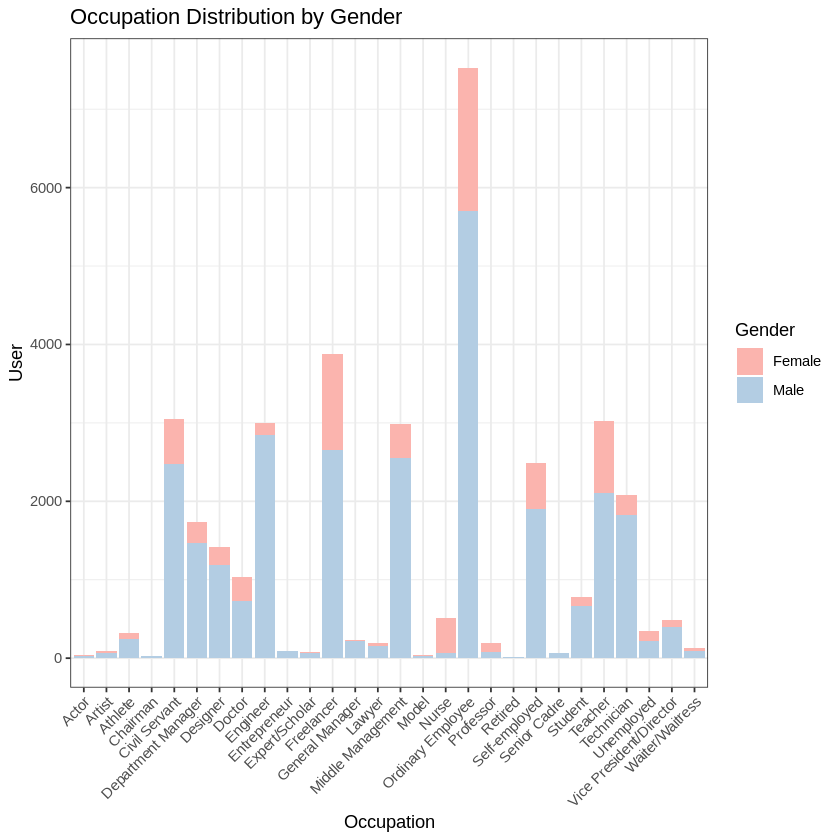

In [ ]:
ggplot(profiles %>% filter(!is.na(job)), aes(x = job, fill = gender)) +
  geom_bar() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(x = "Occupation", y = "User", title = "Occupation Distribution by Gender", fill = "Gender") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

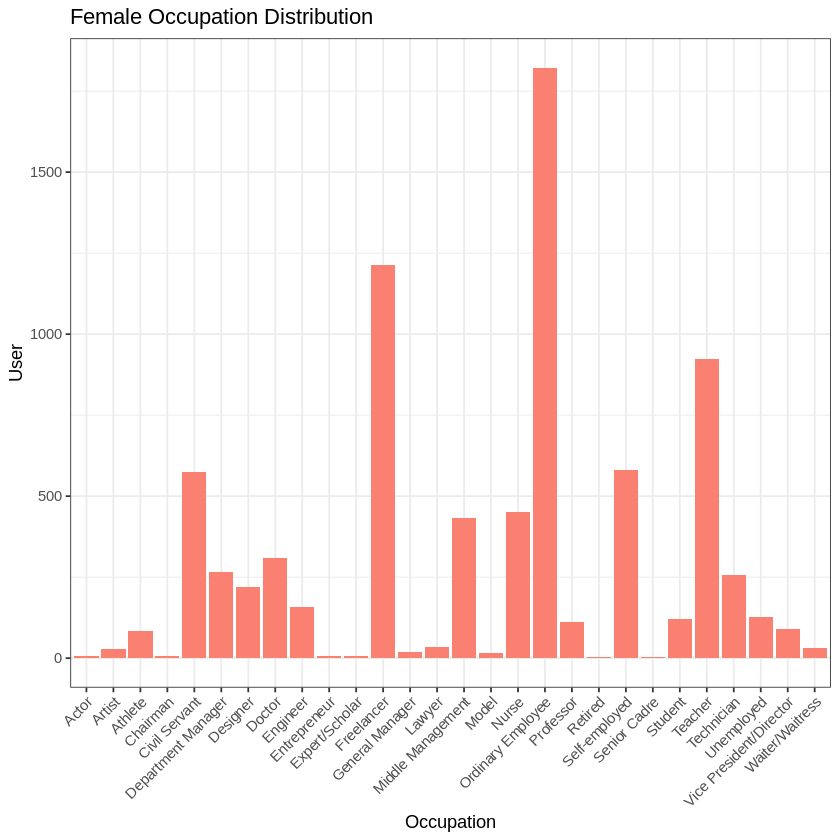

In [ ]:
ggplot(profiles %>% filter(gender == "Female", !is.na(job)), aes(x = job)) +
  geom_bar(fill = "salmon") +
  scale_fill_brewer(palette = "Pastel1") +
  labs(x = "Occupation", y = "User", title = "Female Occupation Distribution") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

analysis for posts 征婚启事分析

In [ ]:
library(ggplot2)
library(dplyr)

In [ ]:
setwd("/content/drive/MyDrive/AAFT_Draft/Data")

posts <- read.csv("web1/postsCleaned.csv") %>%
  filter(!is.na(gender))

# unique(posts$edu)

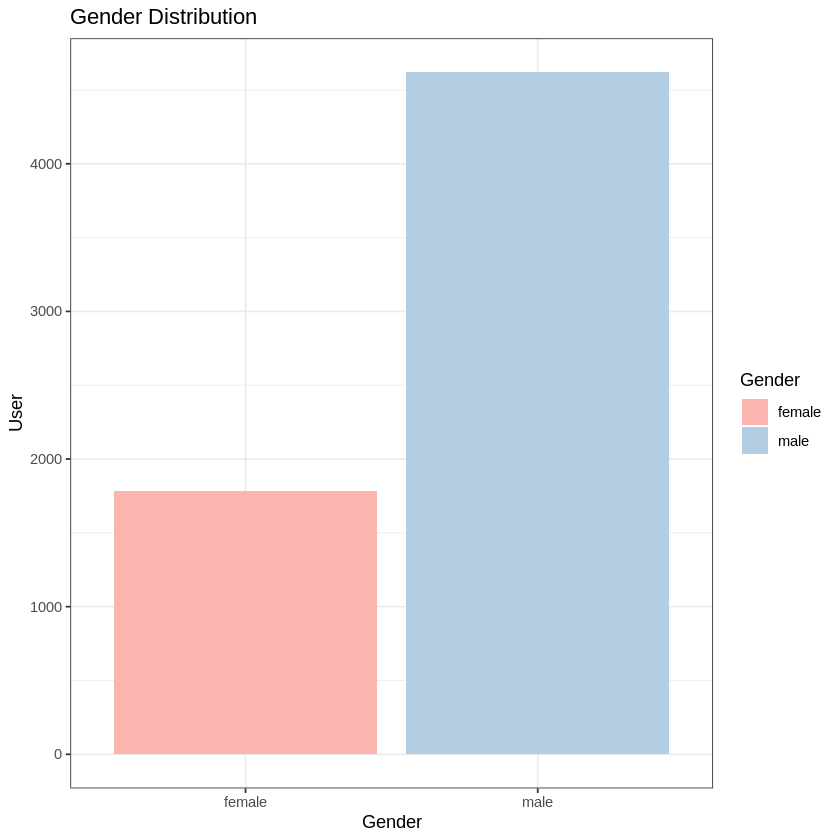

In [ ]:
ggplot(posts, aes(x = gender, fill = gender)) +
  geom_bar() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(x = "Gender", y = "User", title = "Gender Distribution", fill = "Gender") +
  theme_bw()

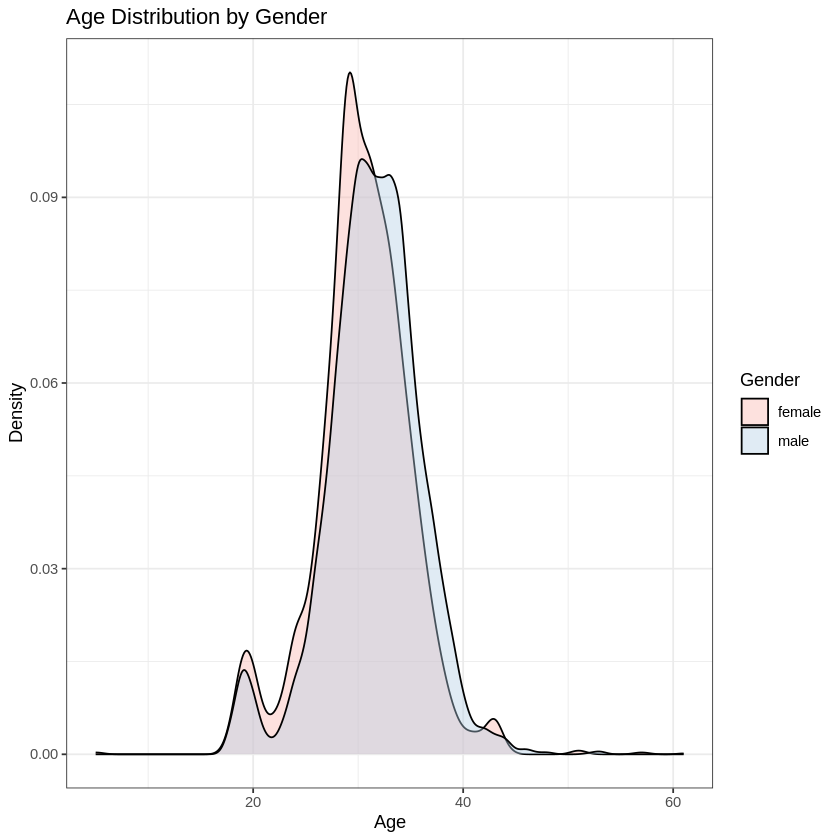

In [ ]:
ggplot(posts %>% filter(!is.na(age)), aes(x = age, fill = gender)) +
  geom_density(alpha = 0.4) +
  scale_fill_brewer(palette = "Pastel1") +
  labs(title = "Age Distribution by Gender", x = "Age", y = "Density", fill = "Gender") +
  theme_bw()

In [ ]:
t.test(posts$age[posts$gender == "male"], posts$age[posts$gender == "female"])


	Welch Two Sample t-test

data:  posts$age[posts$gender == "male"] and posts$age[posts$gender == "female"]
t = 8.2909, df = 3224.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.8008909 1.2970263
sample estimates:
mean of x mean of y 
 31.49459  30.44563 


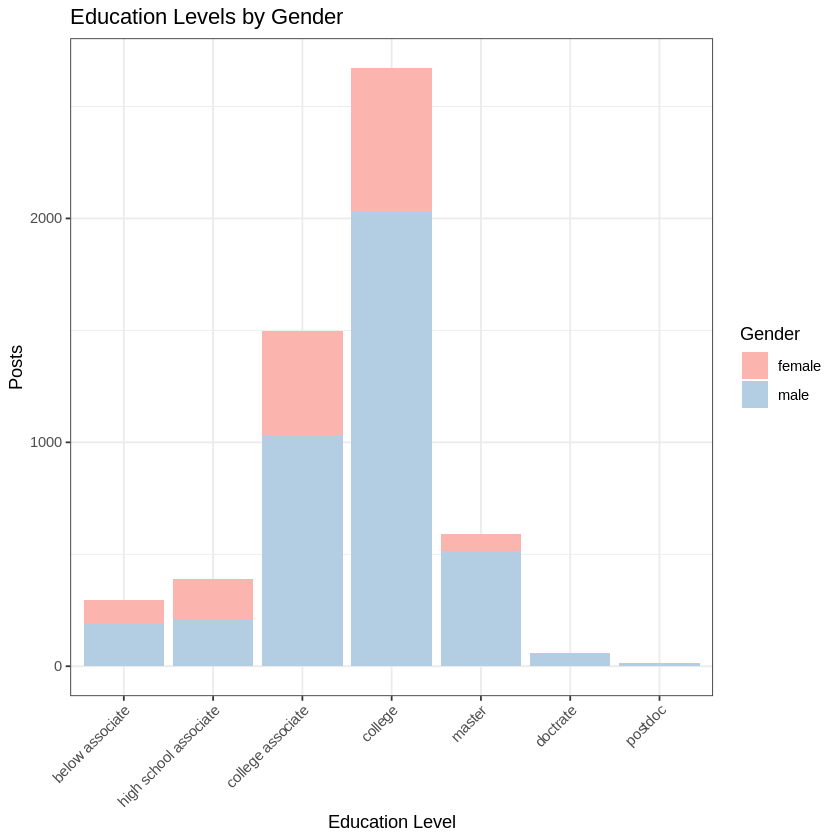

In [ ]:
posts$edu <- factor(posts$edu, levels = c("below associate", "high school associate", "college associate", "college", "master", "doctrate", "postdoc"))

ggplot(posts %>% filter(!is.na(edu)), aes(x = edu, fill = gender)) +
  geom_bar() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(x = "Education Level", y = "Posts", title = "Education Levels by Gender", fill = "Gender") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


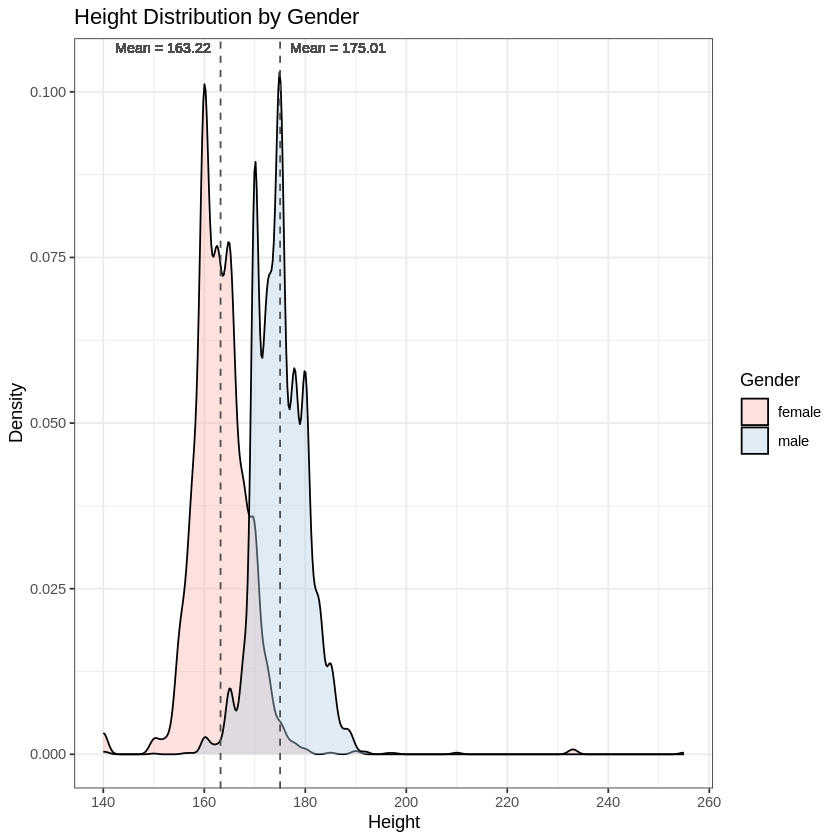

In [ ]:
meanHM <- mean(posts$height[posts$gender == "male"], na.rm = T)
meanHF <- mean(posts$height[posts$gender == "female"], na.rm = T)

ggplot(posts %>% filter(!is.na(height)), aes(x = height, fill = gender)) +
  geom_density(alpha = 0.4) +
  geom_vline(aes(xintercept = meanHM), color = "#4D4D4D", linetype = "dashed", size = 0.5) +
  geom_text(aes(x = meanHM, y = Inf, label = paste("Mean =", round(meanHM, 2))),
            color = "#4D4D4D", size = 3, hjust = -0.1, vjust = 1.5) +
  geom_vline(aes(xintercept = meanHF), color = "#4D4D4D", linetype = "dashed", size = 0.5) +
  geom_text(aes(x = meanHF, y = Inf, label = paste("Mean =", round(meanHF, 2))),
            color = "#4D4D4D", size = 3, hjust = 1.1, vjust = 1.5) +
  scale_fill_brewer(palette = "Pastel1") +
  labs(title = "Height Distribution by Gender", x = "Height", y = "Density", fill = "Gender") +
  theme_bw()

In [ ]:
t.test(posts$height[posts$gender == "male"], posts$height[posts$gender == "female"])


	Welch Two Sample t-test

data:  posts$height[posts$gender == "male"] and posts$height[posts$gender == "female"]
t = 69.905, df = 2678.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 11.46083 12.12234
sample estimates:
mean of x mean of y 
 175.0130  163.2214 


Warning message:
“Removed 2 rows containing non-finite values (`stat_bin()`).”


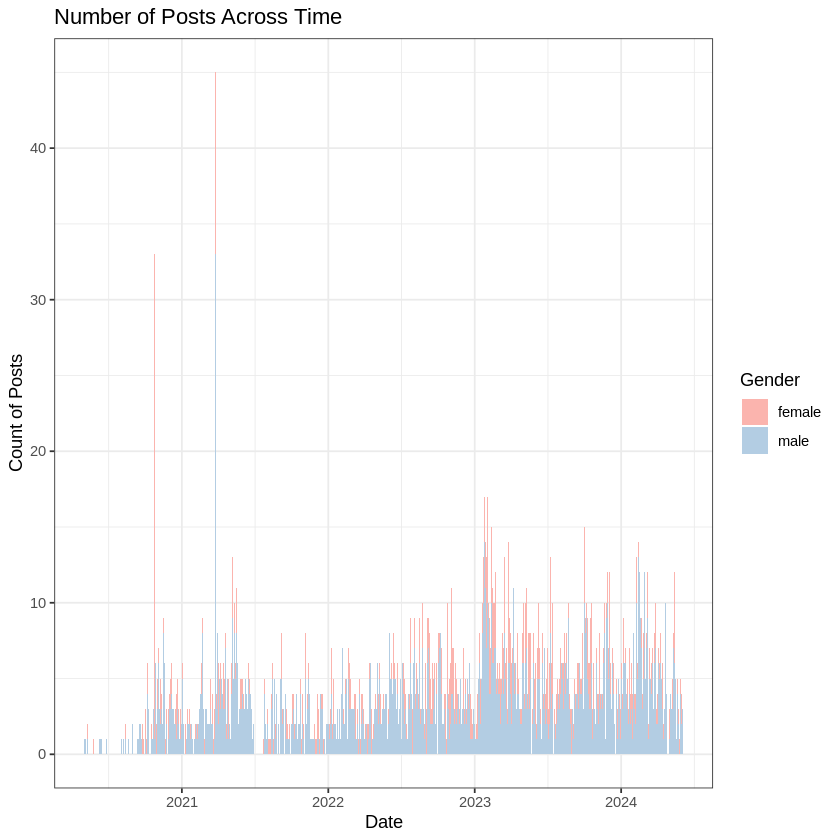

In [ ]:
posts$date <- as.Date(posts$date, format = "%Y-%m-%d")

ggplot(posts, aes(x = date, fill = gender)) +
  geom_histogram(binwidth = 1) +
  scale_fill_brewer(palette = "Pastel1") +
  labs(title = "Number of Posts Across Time", x = "Date", y = "Count of Posts", fill = "Gender") +
  theme_bw()

In [ ]:
posts_by_date_gender <- posts %>%
  group_by(date, gender) %>%
  summarise(count = n(), .groups = 'drop')

total_posts_by_date <- posts_by_date_gender %>%
  group_by(date) %>%
  summarise(total_count = sum(count), .groups = 'drop')

female_posts_by_date <- posts_by_date_gender %>%
  filter(gender == "female") %>%
  rename(female_count = count) %>%
  select(date, female_count)

posts_percentage <- total_posts_by_date %>%
  left_join(female_posts_by_date, by = "date") %>%
  mutate(female_count = ifelse(is.na(female_count), 0, female_count),
         percentage_female = (female_count / total_count) * 100) %>%
  select(date, total_count, percentage_female) %>%
  arrange(desc(total_count))

head(posts_percentage)

date,total_count,percentage_female
<date>,<int>,<dbl>
2021-03-25,45,24.44444
2021-03-26,45,26.66667
2020-10-24,34,88.23529
2020-10-25,33,96.96970
2023-01-26,20,35.00000
2023-01-24,18,11.11111


Abrupt increase in posts on consequtive dates seemed suspicious.

In [ ]:
# make scatter
library(lubridate)

freqM <- posts %>%
  filter(gender == "male") %>%
  mutate(month = floor_date(date, "month")) %>%
  group_by(month) %>%
  summarize(count = n()) %>%
  arrange(desc(count))
freqM$gender <- "Male"

# freqM

freqF <- posts %>%
  filter(gender == "female") %>%
  mutate(month = floor_date(date, "month")) %>%
  group_by(month) %>%
  summarize(count = n()) %>%
  arrange(desc(count))
freqF$gender <- "Female"

freq <- rbind(freqM, freqF)

In [ ]:
# mark slope
getlm <- function(data){
  model <- lm(count~as.numeric(month), data)
  coef <- summary(model)$coefficients
  #coef
  r <- summary(model)$r.squared
  intercept <- coef[1,1]
  slope <- coef[2,1]

  eq_txt <- paste("y = ", round(slope, 2), "x", round(intercept, 2))
  r_txt <- paste("R² = ", round(r, 2))

  return(c(eq_txt, r_txt))
}

lms <- c(getlm(freqM), getlm(freqF))
lms

[1] "y =  0.06 x -1126.21" "R² =  0.36"           "y =  0.02 x -424.31" 
[4] "R² =  0.23"

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


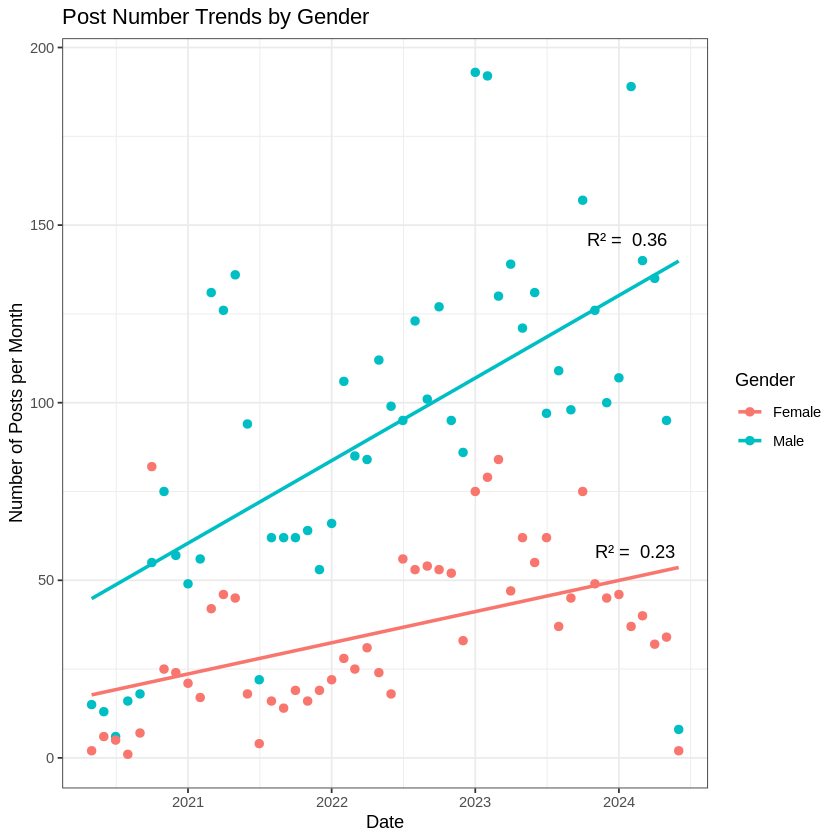

In [ ]:
ggplot(freq %>% filter, aes(x = month, y = count, color = gender)) +
  geom_point(size = 2) +
  geom_smooth(method = "lm", se = F) +
  scale_fill_brewer(palette = "Pastel1") +
  labs(x = "Date", y = "Number of Posts per Month", title = "Post Number Trends by Gender", color = "Gender") +
  #annotate("text", x = as.Date("2023-01-01"), y = Inf, label = lms[1], hjust = -0.4, vjust = 14) +
  annotate("text", x = as.Date("2023-01-01"), y = Inf, label = lms[2], hjust = -1.4, vjust = 16) +
  #annotate("text", x = as.Date("2023-01-01"), y = Inf, label = lms[3], hjust = -0.5, vjust = 38) +
  annotate("text", x = as.Date("2023-01-01"), y = Inf, label = lms[4], hjust = -1.5, vjust = 40) +
  theme_bw()

In [ ]:
#library(psych)
install.packages("psych")